In [1]:
import pandas as pd
import numpy as np
import random
import json
import math
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import csr_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
def set_random_seeds(seed):
    np.random.seed(seed)
    random.seed(seed)

In [3]:
FILES_DIRECTORY = 'data/csv_rows/'
NUMBER_OF_FEATURES = 5000

In [4]:
def print_msg_box(msg, indent=1, width=None, title=None):
    """Print message-box with optional title."""
    lines = msg.split('\n')
    space = " " * indent
    if not width:
        width = max(map(len, lines))
    box = f'╔{"═" * (width + indent * 2)}╗\n'  # upper_border
    if title:
        box += f'║{space}{title:<{width}}{space}║\n'  # title
        box += f'║{space}{"-" * len(title):<{width}}{space}║\n'  # underscore
    box += ''.join([f'║{space}{line:<{width}}{space}║\n' for line in lines])
    box += f'╚{"═" * (width + indent * 2)}╝'  # lower_border
    print(box)


# Create bow model

In [5]:
def shuffle_data(data):
    set_random_seeds(42)
    data = data.sample(frac=1).reset_index(drop=True)
    return data

In [6]:
f_stopwords = open('stopwords.json')
stopwords_list = json.load(f_stopwords)

In [7]:
def create_bow_model(train_data, test_data, metric: str, remove_stop_words: bool):
    #stop words removal
    stop_words = None
    if (remove_stop_words == True):
        stop_words = stopwords_list

    token_pattern = r"(?u)\b\w\w+\b"

    #create model with given metric
    bow = None
    if (metric == 'count'):
        bow = CountVectorizer(
            max_features=NUMBER_OF_FEATURES, stop_words=stop_words, token_pattern=token_pattern)
    elif (metric == 'tfidf'):
        bow = TfidfVectorizer(
            max_features=NUMBER_OF_FEATURES, stop_words=stop_words, token_pattern=token_pattern)
    elif (metric == 'binary'):
        bow = CountVectorizer(max_features=NUMBER_OF_FEATURES, stop_words=stop_words,
                              binary=True, token_pattern=token_pattern)
    else:
        raise ValueError("metric must be either %s or %s or %s!" %
                         ('<count>', '<tfidf>', '<binary>'))

    #create data partititions
    X_train = bow.fit_transform(train_data['content'])
    y_train = train_data['polarity']
    X_test = bow.transform(test_data['content'])
    y_test = test_data['polarity']

    return (X_train, y_train, X_test, y_test)

# Train models

## MNB

In [8]:
def train_MNB(X_train, y_train, X_test, y_test):
    set_random_seeds(42)

    print_msg_box('\n Multinomial Naive Bayes: \n', indent=10)

    clf = MultinomialNB()
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

    print(classification_report(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy: ' + str(acc))
    return acc

## SVM

In [9]:
def train_SVM(X_train, y_train, X_test, y_test):
    set_random_seeds(42)

    print_msg_box('\n SVM: \n', indent=10)

    clf = LinearSVC()
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

    print(classification_report(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy: ' + str(acc))
    return acc

# Main function

In [11]:
def sentiment_analysis(remove_stop_words: bool, metric: str, preprocessing_row: int):

    msg = "Metric: %s\n" \
            "Preprocessing row: %d\n" \
            "Removing stop words: %s" % (metric, preprocessing_row, remove_stop_words)

    print_msg_box(msg=msg, indent=30, title='Sentiment Analysis:')

    #load train data
    print("\nLoad train data from %strain_row_%d.csv" %
          (FILES_DIRECTORY, preprocessing_row))
    train_data = pd.read_csv("%strain_row_%d.csv" % (FILES_DIRECTORY, preprocessing_row))
    train_data['content'] = train_data['content'].values.astype('str')
    
    #shuffle train data
    train_data = shuffle_data(train_data)

    #load test data
    print("Load test data from %stest_row_%d.csv\n" % (FILES_DIRECTORY, preprocessing_row))
    test_data = pd.read_csv("%stest_row_%d.csv" % (FILES_DIRECTORY, preprocessing_row))
    
    #create bow model
    X_train, y_train, X_test, y_test = create_bow_model(
        train_data=train_data, test_data=test_data, metric=metric, remove_stop_words=remove_stop_words)

    #train MNB and SVM
    acc_mnb = train_MNB(X_train=X_train, y_train=y_train,
                        X_test=X_test, y_test=y_test)
    acc_svm = train_SVM(X_train=X_train, y_train=y_train,
                        X_test=X_test, y_test=y_test)
        


# Execution



╔══════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                     ║
║                              -------------------                                     ║
║                              Metric: count                                           ║
║                              Preprocessing row: 1                                    ║
║                              Removing stop words: False                              ║
╚══════════════════════════════════════════════════════════════════════════════════════╝

Load train data from data/csv_rows/train_row_1.csv
Load test data from data/csv_rows/test_row_1.csv

╔══════════════════════════════════════════════╗
║                                              ║
║           Multinomial Naive Bayes:           ║
║                                              ║
╚══════════════════════════════════════════════╝


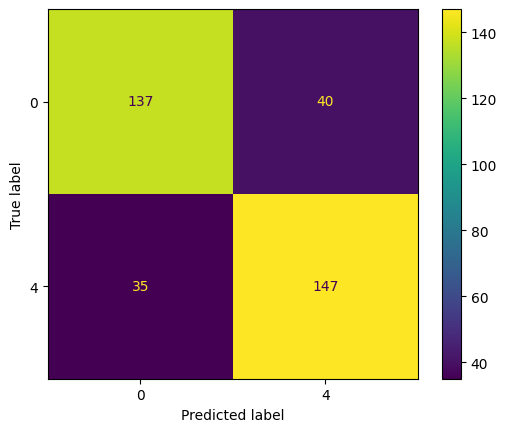

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       177
           4       0.79      0.81      0.80       182

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359

Accuracy: 0.7910863509749304
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


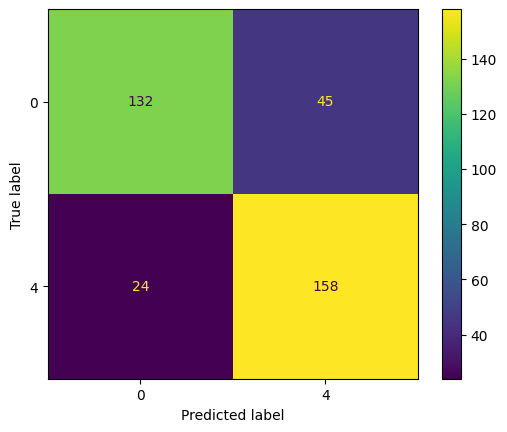

              precision    recall  f1-score   support

           0       0.85      0.75      0.79       177
           4       0.78      0.87      0.82       182

    accuracy                           0.81       359
   macro avg       0.81      0.81      0.81       359
weighted avg       0.81      0.81      0.81       359

Accuracy: 0.807799442896936
╔══════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                     ║
║                              -------------------                                     ║
║                              Metric: count                                           ║
║                              Preprocessing row: 2                                    ║
║                              Removing stop words: False                              ║
╚══════════════════════════════════════════════════════════════════════════════════════╝

Load train data from 

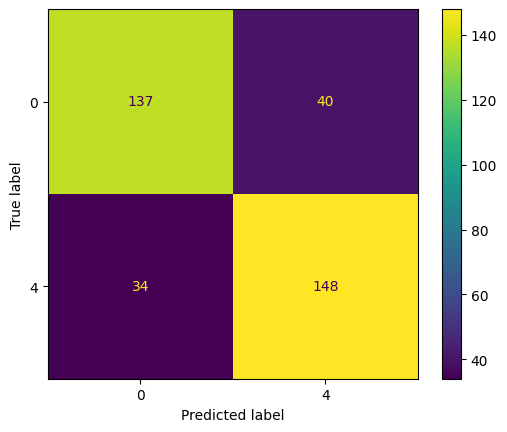

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       177
           4       0.79      0.81      0.80       182

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359

Accuracy: 0.7938718662952646
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


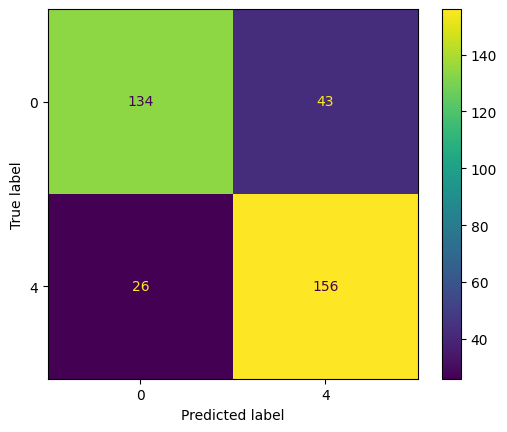

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       177
           4       0.78      0.86      0.82       182

    accuracy                           0.81       359
   macro avg       0.81      0.81      0.81       359
weighted avg       0.81      0.81      0.81       359

Accuracy: 0.807799442896936
╔═════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                    ║
║                              -------------------                                    ║
║                              Metric: count                                          ║
║                              Preprocessing row: 3                                   ║
║                              Removing stop words: True                              ║
╚═════════════════════════════════════════════════════════════════════════════════════╝

Load train data from data/cs

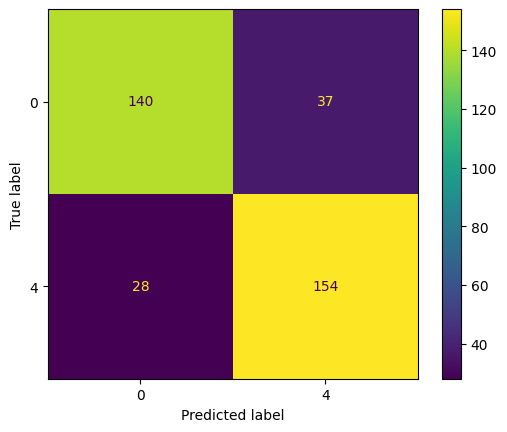

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       177
           4       0.81      0.85      0.83       182

    accuracy                           0.82       359
   macro avg       0.82      0.82      0.82       359
weighted avg       0.82      0.82      0.82       359

Accuracy: 0.8189415041782729
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


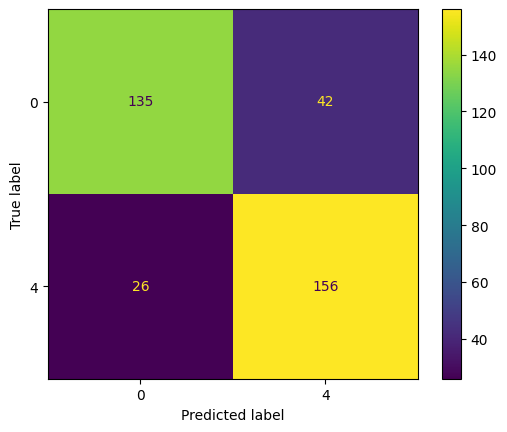

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       177
           4       0.79      0.86      0.82       182

    accuracy                           0.81       359
   macro avg       0.81      0.81      0.81       359
weighted avg       0.81      0.81      0.81       359

Accuracy: 0.8105849582172702
╔══════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                     ║
║                              -------------------                                     ║
║                              Metric: count                                           ║
║                              Preprocessing row: 4                                    ║
║                              Removing stop words: False                              ║
╚══════════════════════════════════════════════════════════════════════════════════════╝

Load train data from

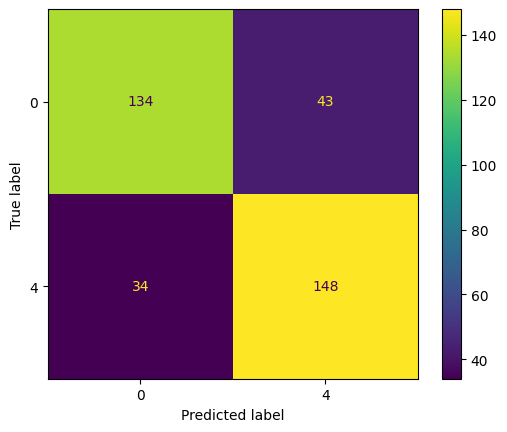

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       177
           4       0.77      0.81      0.79       182

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359

Accuracy: 0.7855153203342619
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


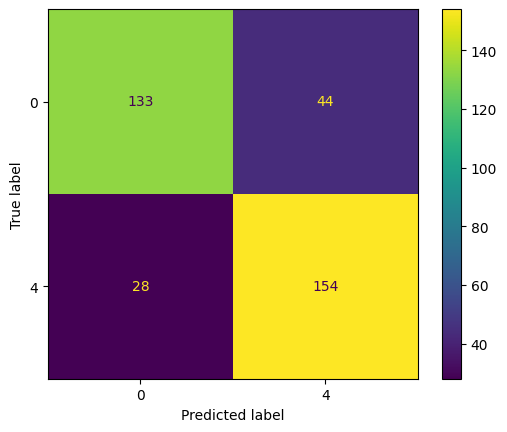

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       177
           4       0.78      0.85      0.81       182

    accuracy                           0.80       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.80      0.80      0.80       359

Accuracy: 0.7994428969359332
╔═════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                    ║
║                              -------------------                                    ║
║                              Metric: count                                          ║
║                              Preprocessing row: 5                                   ║
║                              Removing stop words: True                              ║
╚═════════════════════════════════════════════════════════════════════════════════════╝

Load train data from data/c

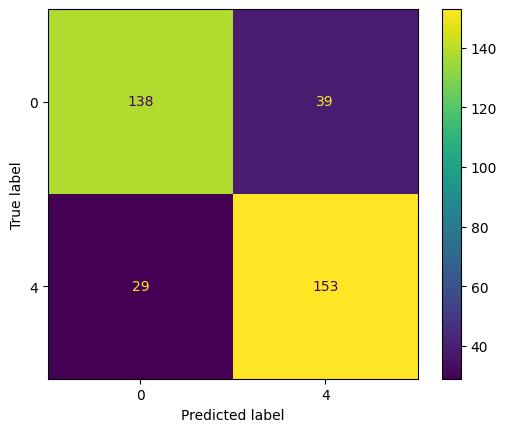

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       177
           4       0.80      0.84      0.82       182

    accuracy                           0.81       359
   macro avg       0.81      0.81      0.81       359
weighted avg       0.81      0.81      0.81       359

Accuracy: 0.8105849582172702
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


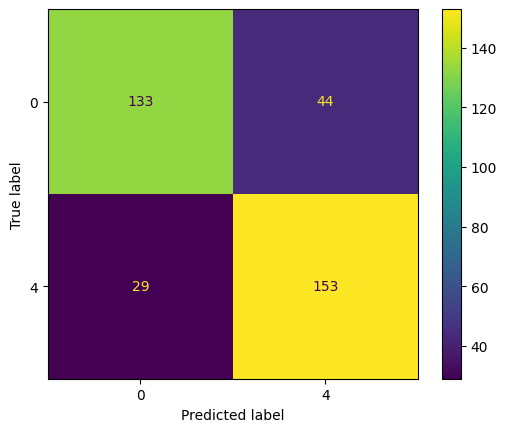

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       177
           4       0.78      0.84      0.81       182

    accuracy                           0.80       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.80      0.80      0.80       359

Accuracy: 0.7966573816155988


╔══════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                     ║
║                              -------------------                                     ║
║                              Metric: tfidf                                           ║
║                              Preprocessing row: 1                                    ║
║                              Removing stop words: False                              ║
╚══════════════════════════════════════════════════════════════════════════════════════╝

Load train data fr

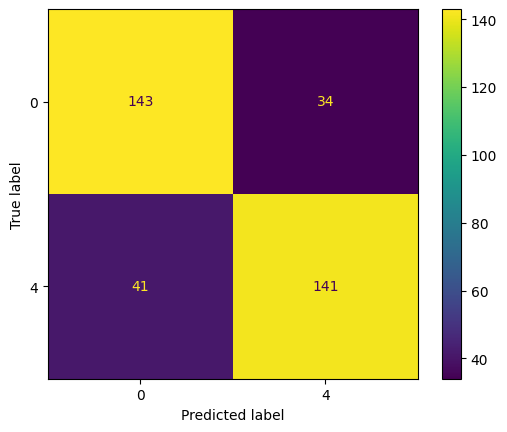

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       177
           4       0.81      0.77      0.79       182

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359

Accuracy: 0.7910863509749304
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


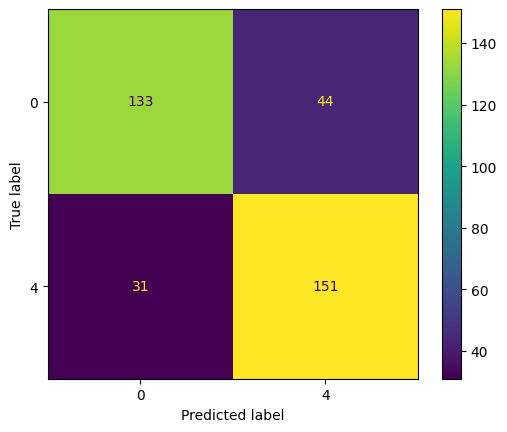

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       177
           4       0.77      0.83      0.80       182

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359

Accuracy: 0.7910863509749304
╔══════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                     ║
║                              -------------------                                     ║
║                              Metric: tfidf                                           ║
║                              Preprocessing row: 2                                    ║
║                              Removing stop words: False                              ║
╚══════════════════════════════════════════════════════════════════════════════════════╝

Load train data from

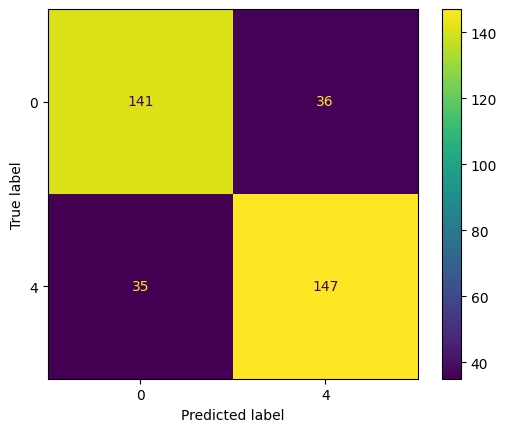

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       177
           4       0.80      0.81      0.81       182

    accuracy                           0.80       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.80      0.80      0.80       359

Accuracy: 0.8022284122562674
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


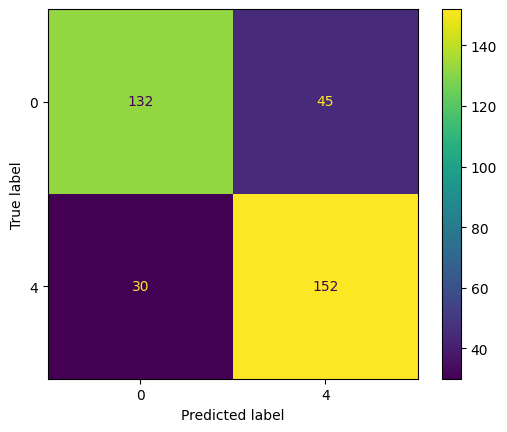

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       177
           4       0.77      0.84      0.80       182

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359

Accuracy: 0.7910863509749304
╔═════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                    ║
║                              -------------------                                    ║
║                              Metric: tfidf                                          ║
║                              Preprocessing row: 3                                   ║
║                              Removing stop words: True                              ║
╚═════════════════════════════════════════════════════════════════════════════════════╝

Load train data from data/c

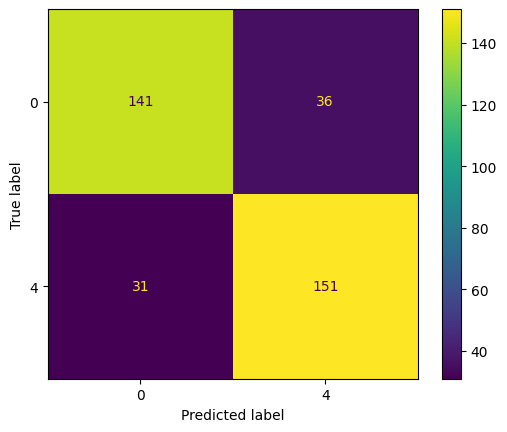

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       177
           4       0.81      0.83      0.82       182

    accuracy                           0.81       359
   macro avg       0.81      0.81      0.81       359
weighted avg       0.81      0.81      0.81       359

Accuracy: 0.8133704735376045
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


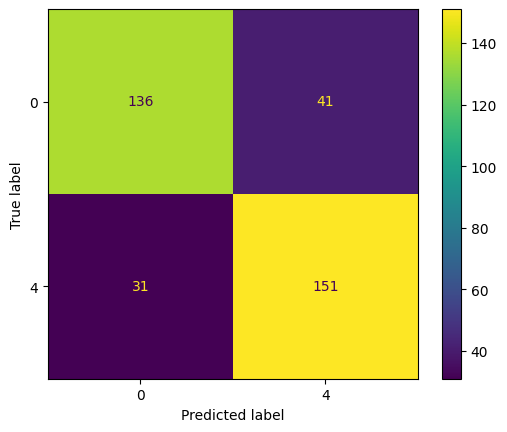

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       177
           4       0.79      0.83      0.81       182

    accuracy                           0.80       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.80      0.80      0.80       359

Accuracy: 0.7994428969359332
╔══════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                     ║
║                              -------------------                                     ║
║                              Metric: tfidf                                           ║
║                              Preprocessing row: 4                                    ║
║                              Removing stop words: False                              ║
╚══════════════════════════════════════════════════════════════════════════════════════╝

Load train data from

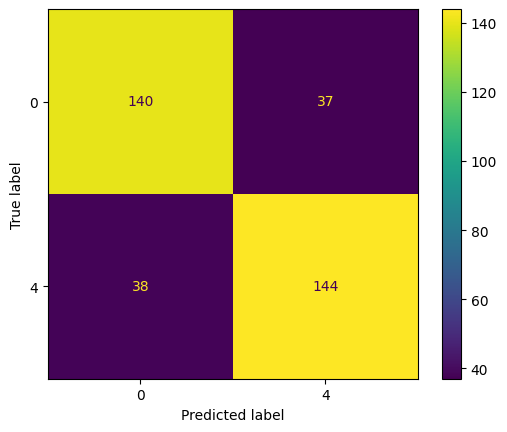

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       177
           4       0.80      0.79      0.79       182

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359

Accuracy: 0.7910863509749304
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


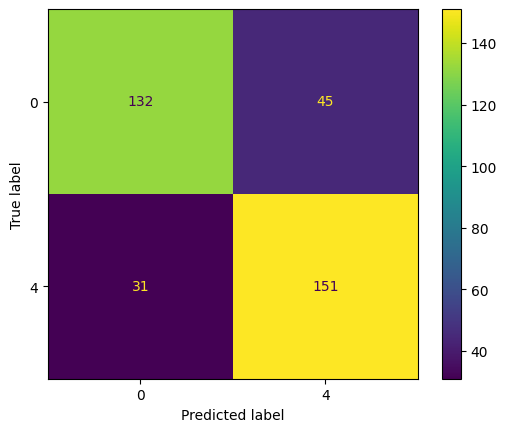

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       177
           4       0.77      0.83      0.80       182

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359

Accuracy: 0.7883008356545961
╔═════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                    ║
║                              -------------------                                    ║
║                              Metric: tfidf                                          ║
║                              Preprocessing row: 5                                   ║
║                              Removing stop words: True                              ║
╚═════════════════════════════════════════════════════════════════════════════════════╝

Load train data from data/c

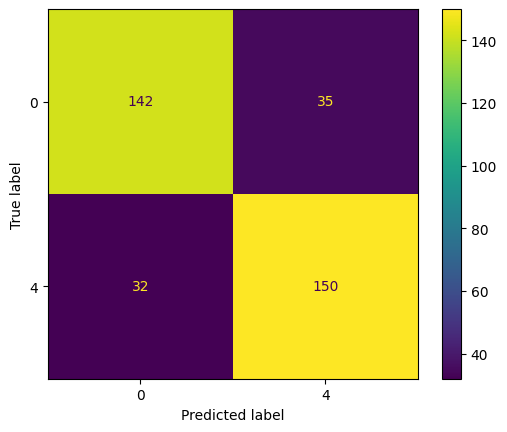

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       177
           4       0.81      0.82      0.82       182

    accuracy                           0.81       359
   macro avg       0.81      0.81      0.81       359
weighted avg       0.81      0.81      0.81       359

Accuracy: 0.8133704735376045
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


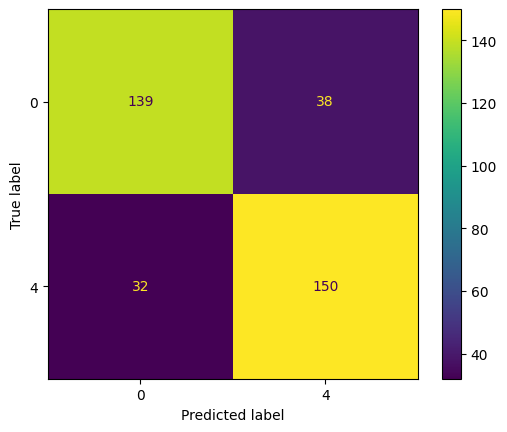

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       177
           4       0.80      0.82      0.81       182

    accuracy                           0.81       359
   macro avg       0.81      0.80      0.80       359
weighted avg       0.81      0.81      0.80       359

Accuracy: 0.8050139275766016


╔══════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                     ║
║                              -------------------                                     ║
║                              Metric: binary                                          ║
║                              Preprocessing row: 1                                    ║
║                              Removing stop words: False                              ║
╚══════════════════════════════════════════════════════════════════════════════════════╝

Load train data fr

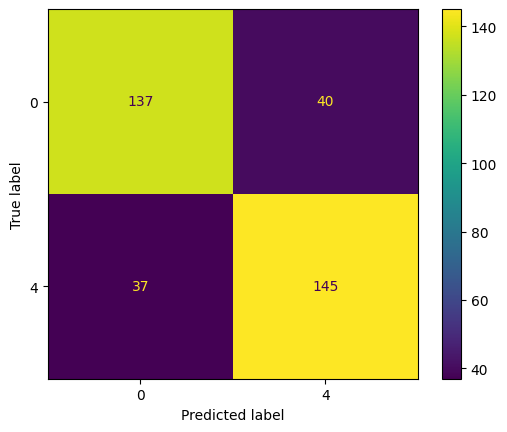

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       177
           4       0.78      0.80      0.79       182

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359

Accuracy: 0.7855153203342619
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


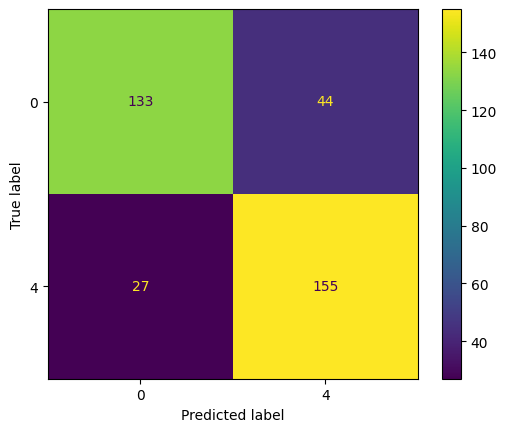

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       177
           4       0.78      0.85      0.81       182

    accuracy                           0.80       359
   macro avg       0.81      0.80      0.80       359
weighted avg       0.80      0.80      0.80       359

Accuracy: 0.8022284122562674
╔══════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                     ║
║                              -------------------                                     ║
║                              Metric: binary                                          ║
║                              Preprocessing row: 2                                    ║
║                              Removing stop words: False                              ║
╚══════════════════════════════════════════════════════════════════════════════════════╝

Load train data from

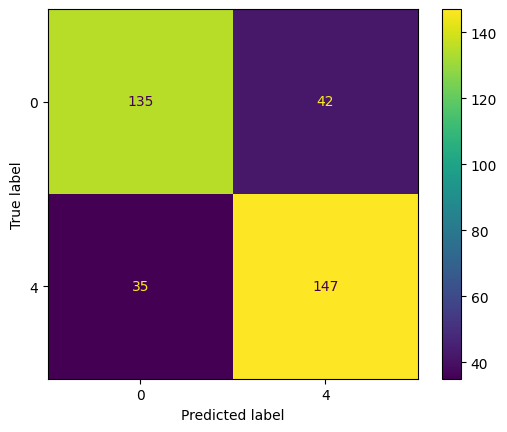

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       177
           4       0.78      0.81      0.79       182

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359

Accuracy: 0.7855153203342619
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


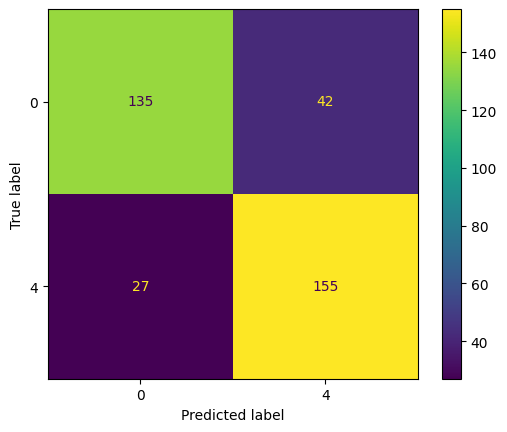

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       177
           4       0.79      0.85      0.82       182

    accuracy                           0.81       359
   macro avg       0.81      0.81      0.81       359
weighted avg       0.81      0.81      0.81       359

Accuracy: 0.807799442896936
╔═════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                    ║
║                              -------------------                                    ║
║                              Metric: binary                                         ║
║                              Preprocessing row: 3                                   ║
║                              Removing stop words: True                              ║
╚═════════════════════════════════════════════════════════════════════════════════════╝

Load train data from data/cs

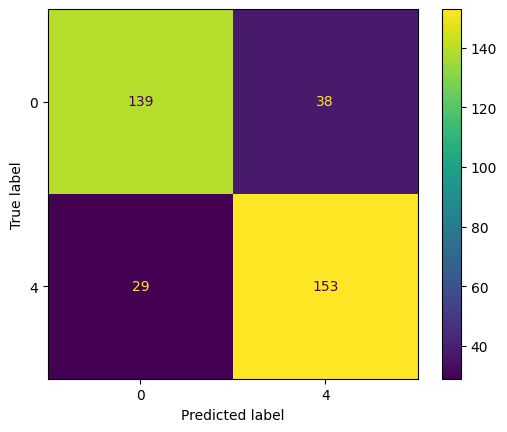

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       177
           4       0.80      0.84      0.82       182

    accuracy                           0.81       359
   macro avg       0.81      0.81      0.81       359
weighted avg       0.81      0.81      0.81       359

Accuracy: 0.8133704735376045
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


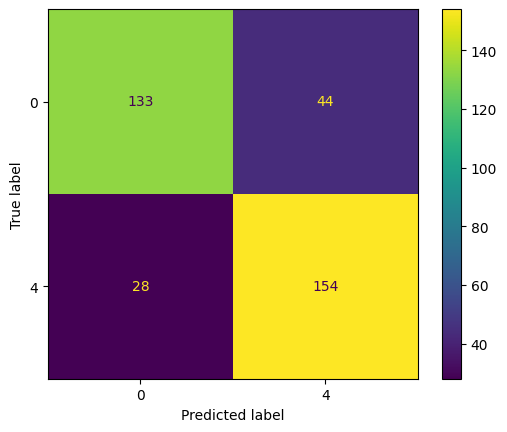

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       177
           4       0.78      0.85      0.81       182

    accuracy                           0.80       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.80      0.80      0.80       359

Accuracy: 0.7994428969359332
╔══════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                     ║
║                              -------------------                                     ║
║                              Metric: binary                                          ║
║                              Preprocessing row: 4                                    ║
║                              Removing stop words: False                              ║
╚══════════════════════════════════════════════════════════════════════════════════════╝

Load train data from

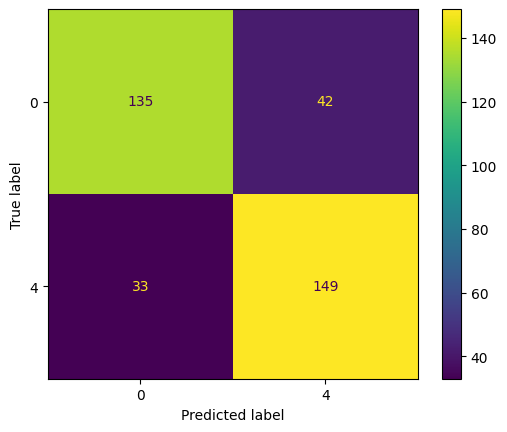

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       177
           4       0.78      0.82      0.80       182

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359

Accuracy: 0.7910863509749304
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


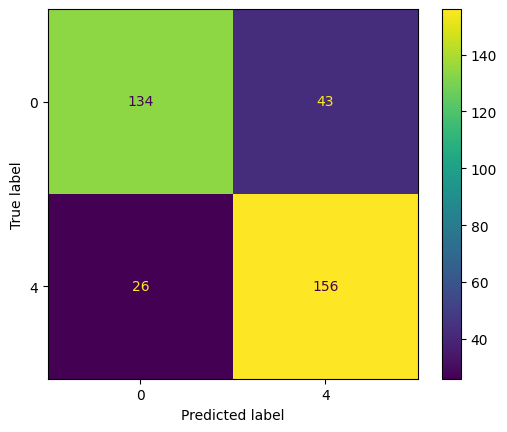

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       177
           4       0.78      0.86      0.82       182

    accuracy                           0.81       359
   macro avg       0.81      0.81      0.81       359
weighted avg       0.81      0.81      0.81       359

Accuracy: 0.807799442896936
╔═════════════════════════════════════════════════════════════════════════════════════╗
║                              Sentiment Analysis:                                    ║
║                              -------------------                                    ║
║                              Metric: binary                                         ║
║                              Preprocessing row: 5                                   ║
║                              Removing stop words: True                              ║
╚═════════════════════════════════════════════════════════════════════════════════════╝

Load train data from data/cs

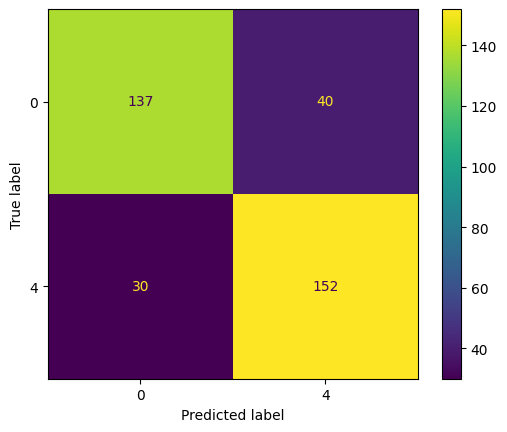

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       177
           4       0.79      0.84      0.81       182

    accuracy                           0.81       359
   macro avg       0.81      0.80      0.80       359
weighted avg       0.81      0.81      0.80       359

Accuracy: 0.8050139275766016
╔══════════════════════════╗
║                          ║
║           SVM:           ║
║                          ║
╚══════════════════════════╝


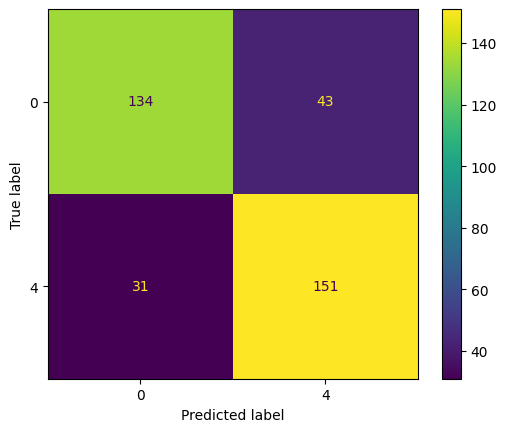

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       177
           4       0.78      0.83      0.80       182

    accuracy                           0.79       359
   macro avg       0.80      0.79      0.79       359
weighted avg       0.80      0.79      0.79       359

Accuracy: 0.7938718662952646


In [12]:
metrics = ["count", "tfidf", "binary"]

for m in metrics:
    print("\n")
    for i in range(1, 6):  # [1,2,3,4,5]
        # Rows 3 and 5 expect removal of stopwords
        remove_stop_words = True if i in [3, 5] else False
        sentiment_analysis(remove_stop_words, metric=m, preprocessing_row=i)

## Save results as csv

In [13]:
results_df.to_csv("results.csv")